In [1]:
#import dependencies and file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
pd.options.display.float_format = '${:,.2f}'.format
salary_df = pd.read_csv("Resources/data_salaries_cleaned.csv")

salary_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
0,0,2023,MI,FT,Analytics Engineer,300000,0,M
1,1,2023,MI,FT,Analytics Engineer,60000,0,M
2,2,2023,MI,FT,Data Scientist,150000,0,M
3,3,2023,MI,FT,Data Scientist,125000,0,M
4,4,2023,SE,FT,Data Scientist,150000,100,M
...,...,...,...,...,...,...,...,...
7872,7913,2021,SE,FT,Data Specialist,165000,100,L
7873,7914,2020,SE,FT,Data Scientist,412000,100,L
7874,7915,2021,MI,FT,Principal Data Scientist,151000,100,L
7875,7916,2020,EN,FT,Data Scientist,105000,100,S


In [2]:
experience_entry_df = salary_df.loc[(salary_df["experience_level"]=="EN")]
experience_entry_df["job_title"].value_counts()

job_title
Data Engineer                         88
Data Analyst                          87
Data Scientist                        75
Research Scientist                    21
Machine Learning Engineer             19
Research Engineer                     15
Data Integration Specialist            8
AI Scientist                           6
BI Data Analyst                        6
Applied Scientist                      6
Data Science Consultant                6
Analytics Engineer                     5
AI Developer                           5
Machine Learning Developer             5
Business Data Analyst                  4
Applied Data Scientist                 4
Research Analyst                       4
AI Programmer                          4
Big Data Engineer                      3
Computer Vision Engineer               3
Machine Learning Scientist             3
ML Engineer                            2
Cloud Data Engineer                    2
Computer Vision Software Engineer      2
Applie

In [3]:
salary_df["job_title"].value_counts().head(20)



job_title
Data Engineer                     1873
Data Scientist                    1675
Data Analyst                      1179
Machine Learning Engineer          801
Applied Scientist                  226
Research Scientist                 217
Analytics Engineer                 216
Data Architect                     177
Research Engineer                  123
Data Manager                       122
Business Intelligence Engineer      98
Data Science Manager                90
ML Engineer                         85
Machine Learning Scientist          66
BI Developer                        42
Data Analytics Manager              39
Decision Scientist                  36
Data Specialist                     36
Data Science Consultant             34
Business Intelligence Analyst       32
Name: count, dtype: int64

In [4]:
salary_df["work_year"].value_counts()

work_year
2023    5964
2022    1636
2021     208
2020      69
Name: count, dtype: int64

In [5]:
#separate by year
salary_df_2020 = salary_df.loc[(salary_df["work_year"]==2020)]
salary_df_2021 = salary_df.loc[(salary_df["work_year"]==2021)]
salary_df_2022 = salary_df.loc[(salary_df["work_year"]==2022)]
salary_df_2023 = salary_df.loc[(salary_df["work_year"]==2023)]

In [6]:
#find total average salary in the field for each year
average_salary_2020 = salary_df_2020["salary"].mean()
average_salary_2021 = salary_df_2021["salary"].mean()
average_salary_2022 = salary_df_2022["salary"].mean()
average_salary_2023 = salary_df_2023["salary"].mean()


print(average_salary_2020)
print(average_salary_2021)
print(average_salary_2022)
print(average_salary_2023)

383113.17391304346
579841.1586538461
167129.77383863082
163339.29828973842


In [7]:
#graph showing trends of the field by year
average_field_salary_df = pd.DataFrame({"2020":average_salary_2020,
                                   "2021":average_salary_2021,
                                   "2022":average_salary_2022,
                                   "2023":average_salary_2023}, index=["Average Salary for the field"]).T
average_field_salary_df

,Average Salary for the field
2020,"$383,113.17"
2021,"$579,841.16"
2022,"$167,129.77"
2023,"$163,339.30"


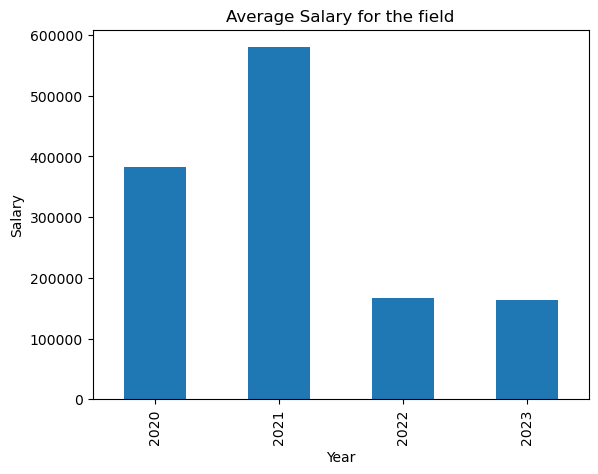

In [8]:
average_field_salary_df.plot.bar(xlabel="Year",ylabel="Salary",legend=False,title="Average Salary for the field")
plt.savefig("Output/Average_Salary_field.jpeg")
plt.show()

In [9]:
#Find mean by level of position for each year
average_entry_2020 = salary_df_2020.loc[salary_df_2020["experience_level"]=="EN",["salary"]].mean()
average_entry_2021 = salary_df_2021.loc[salary_df_2021["experience_level"]=="EN",["salary"]].mean()
average_entry_2022 = salary_df_2022.loc[salary_df_2022["experience_level"]=="EN",["salary"]].mean()
average_entry_2023 = salary_df_2023.loc[salary_df_2023["experience_level"]=="EN",["salary"]].mean()

print(average_entry_2020)
print(average_entry_2021)
print(average_entry_2022)
print(average_entry_2023)

salary   $347,423.53
dtype: float64
salary   $302,394.18
dtype: float64
salary   $222,893.79
dtype: float64
salary   $132,983.11
dtype: float64


In [35]:
average_entry_salary_df = pd.DataFrame({"2020":average_entry_2020,
                                   "2021":average_entry_2021,
                                   "2022":average_entry_2022,
                                   "2023":average_entry_2023}).T
average_entry_salary_df=average_entry_salary_df.rename(columns={"salary":"Average Entry Level Salary"})
average_entry_salary_df

,Average Entry Level Salary
2020,"$347,423.53"
2021,"$302,394.18"
2022,"$222,893.79"
2023,"$132,983.11"


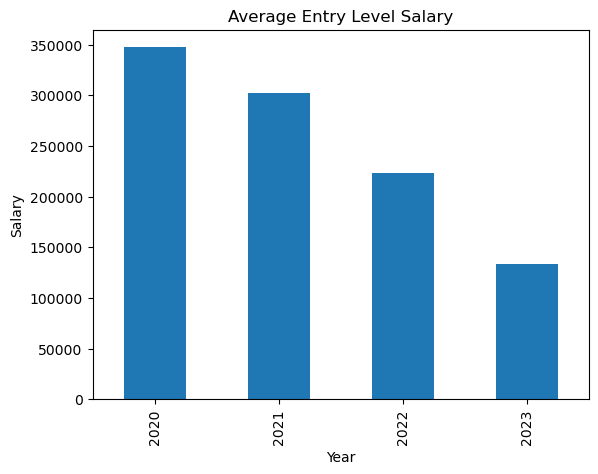

In [36]:
average_entry_salary_df.plot.bar(xlabel="Year",ylabel="Salary",legend=False,title="Average Entry Level Salary")
plt.savefig("Output/Average_Entry_Level_Salary.jpeg")
plt.show()

In [11]:
#filter out the outliers for the 4 most popular job titles in each year
#Create list to iterate through for function filtering
jobslist = ["Data Analyst","Data Engineer","Data Scientist","Machine Learning Engineer"]
def filter_outliers(df,job_titles):
    newlist = []
    for title in job_titles:
        quartiles = df.loc[df["job_title"]==f"{title}",["salary"]].quantile([.25,.75])
        lowerq = quartiles.loc[0.25,"salary"]
        upperq = quartiles.loc[0.75,"salary"]
        iqr = upperq-lowerq

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)

        filtered_df = df.query(f"job_title =='{title}' and salary > {lower_bound} and salary < {upper_bound}")
        newlist.append(filtered_df)
    
    return pd.concat(newlist)



In [12]:
salary_df_2020 = filter_outliers(salary_df_2020,jobslist)
salary_df_2020

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
3092,3096,2020,EN,FT,Data Analyst,42000,0,L
7292,7320,2020,EN,FT,Data Analyst,20000,100,M
7670,7702,2020,MI,FT,Data Analyst,41000,50,L
7739,7773,2020,EN,FT,Data Analyst,91000,100,L
7769,7805,2020,EN,FT,Data Analyst,72000,100,L
7809,7845,2020,MI,FT,Data Analyst,85000,100,L
7598,7627,2020,EN,FT,Data Engineer,48000,100,L
7653,7685,2020,MI,FT,Data Engineer,51999,100,S
7671,7703,2020,MI,FT,Data Engineer,65000,50,L
7701,7734,2020,EX,FT,Data Engineer,70000,50,L


In [13]:
salary_df_2021 = filter_outliers(salary_df_2021,jobslist)
salary_df_2021

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
6300,6319,2021,SE,FT,Data Analyst,115000,100,S
6867,6891,2021,EN,FT,Data Analyst,56000,50,L
7100,7126,2021,SE,FT,Data Analyst,50000,100,S
7617,7647,2021,MI,FT,Data Analyst,135000,100,L
7629,7659,2021,MI,FT,Data Analyst,90000,100,M
...,...,...,...,...,...,...,...,...
7814,7851,2021,MI,FT,Machine Learning Engineer,180000,100,L
7817,7854,2021,MI,FT,Machine Learning Engineer,75000,100,M
7824,7862,2021,MI,FT,Machine Learning Engineer,21000,50,L
7827,7866,2021,SE,FT,Machine Learning Engineer,200000,100,L


In [14]:
salary_df_2022 = filter_outliers(salary_df_2022,jobslist)
salary_df_2022

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
6025,6044,2022,MI,FT,Data Analyst,150000,0,M
6026,6045,2022,MI,FT,Data Analyst,100000,0,M
6045,6064,2022,MI,FT,Data Analyst,150000,0,M
6046,6065,2022,MI,FT,Data Analyst,100000,0,M
6062,6081,2022,SE,FT,Data Analyst,149000,100,M
...,...,...,...,...,...,...,...,...
7563,7591,2022,SE,FT,Machine Learning Engineer,65000,100,S
7575,7603,2022,MI,FT,Machine Learning Engineer,120000,100,S
7584,7613,2022,SE,FT,Machine Learning Engineer,65000,100,S
7594,7623,2022,MI,FT,Machine Learning Engineer,121000,100,L


In [15]:
salary_df_2023 = filter_outliers(salary_df_2023,jobslist)
salary_df_2023

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
10,10,2023,SE,FT,Data Analyst,125000,100,M
11,11,2023,SE,FT,Data Analyst,115000,100,M
20,20,2023,SE,FT,Data Analyst,185000,0,M
21,21,2023,SE,FT,Data Analyst,160000,0,M
74,74,2023,SE,FT,Data Analyst,93919,100,M
...,...,...,...,...,...,...,...,...
5983,6002,2023,MI,FT,Machine Learning Engineer,52000,100,M
5986,6005,2023,MI,FT,Machine Learning Engineer,48000,100,M
5987,6006,2023,MI,FT,Machine Learning Engineer,38000,100,M
5999,6018,2023,SE,FT,Machine Learning Engineer,261500,0,L


In [16]:
#Finding mean by job title by year. Narrowing down to the most popular job titles, 
#which are Data Analyst, Data Engineer, Data Scientist, and Machine Learning Engineer
#Start with 2020
average_salary_2020_DA = salary_df_2020.loc[salary_df_2020["job_title"]=="Data Analyst",["salary"]].mean()
average_salary_2020_DE = salary_df_2020.loc[salary_df_2020["job_title"]=="Data Engineer",["salary"]].mean()
average_salary_2020_DS = salary_df_2020.loc[salary_df_2020["job_title"]=="Data Scientist",["salary"]].mean()
average_salary_2020_MLE = salary_df_2020.loc[salary_df_2020["job_title"]=="Machine Learning Engineer",["salary"]].mean()

print(average_salary_2020_DA)
print(average_salary_2020_DE)
print(average_salary_2020_DS)
print(average_salary_2020_MLE)

salary   $58,500.00
dtype: float64
salary   $87,390.82
dtype: float64
salary   $70,959.41
dtype: float64
salary   $144,500.00
dtype: float64


In [17]:
#2021 by title
average_salary_2021_DA = salary_df_2021.loc[salary_df_2021["job_title"]=="Data Analyst",["salary"]].mean()
average_salary_2021_DE = salary_df_2021.loc[salary_df_2021["job_title"]=="Data Engineer",["salary"]].mean()
average_salary_2021_DS = salary_df_2021.loc[salary_df_2021["job_title"]=="Data Scientist",["salary"]].mean()
average_salary_2021_MLE = salary_df_2021.loc[salary_df_2021["job_title"]=="Machine Learning Engineer",["salary"]].mean()

print(average_salary_2021_DA)
print(average_salary_2021_DE)
print(average_salary_2021_DS)
print(average_salary_2021_MLE)

salary   $74,858.67
dtype: float64
salary   $108,388.64
dtype: float64
salary   $91,260.00
dtype: float64
salary   $82,627.75
dtype: float64


In [18]:
#2022 by title
average_salary_2022_DA = salary_df_2022.loc[salary_df_2022["job_title"]=="Data Analyst",["salary"]].mean()
average_salary_2022_DE = salary_df_2022.loc[salary_df_2022["job_title"]=="Data Engineer",["salary"]].mean()
average_salary_2022_DS = salary_df_2022.loc[salary_df_2022["job_title"]=="Data Scientist",["salary"]].mean()
average_salary_2022_MLE = salary_df_2022.loc[salary_df_2022["job_title"]=="Machine Learning Engineer",["salary"]].mean()

print(average_salary_2022_DA)
print(average_salary_2022_DE)
print(average_salary_2022_DS)
print(average_salary_2022_MLE)

salary   $105,583.58
dtype: float64
salary   $135,463.82
dtype: float64
salary   $137,925.34
dtype: float64
salary   $151,210.74
dtype: float64


In [19]:
#2023 by title
average_salary_2023_DA = salary_df_2023.loc[salary_df_2023["job_title"]=="Data Analyst",["salary"]].mean()
average_salary_2023_DE = salary_df_2023.loc[salary_df_2023["job_title"]=="Data Engineer",["salary"]].mean()
average_salary_2023_DS = salary_df_2023.loc[salary_df_2023["job_title"]=="Data Scientist",["salary"]].mean()
average_salary_2023_MLE = salary_df_2023.loc[salary_df_2023["job_title"]=="Machine Learning Engineer",["salary"]].mean()

print(average_salary_2023_DA)
print(average_salary_2023_DE)
print(average_salary_2023_DS)
print(average_salary_2023_MLE)

salary   $109,472.25
dtype: float64
salary   $148,378.81
dtype: float64
salary   $162,942.43
dtype: float64
salary   $190,905.57
dtype: float64


In [20]:
#Create dataframes for each job title
#Data Analyst averages
average_DA_salary_df = pd.DataFrame({"2020":average_salary_2020_DA,
                                   "2021":average_salary_2021_DA,
                                   "2022":average_salary_2022_DA,
                                   "2023":average_salary_2023_DA}).T
average_DA_salary_df=average_DA_salary_df.rename(columns={"salary":"Data Analyst Average Salary"})
average_DA_salary_df

,Data Analyst Average Salary
2020,"$58,500.00"
2021,"$74,858.67"
2022,"$105,583.58"
2023,"$109,472.25"


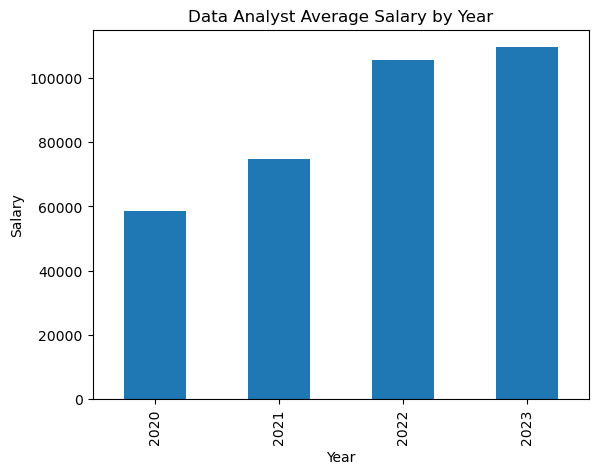

In [21]:
average_DA_salary_df.plot.bar(xlabel="Year",ylabel="Salary",legend=False,title="Data Analyst Average Salary by Year")
plt.savefig("Output/DA_bar_graph.png")
plt.show()

In [22]:
#Data Scientist averages
average_DS_salary_df = pd.DataFrame({"2020":average_salary_2020_DS,
                                   "2021":average_salary_2021_DS,
                                   "2022":average_salary_2022_DS,
                                   "2023":average_salary_2023_DS}).T
average_DS_salary_df=average_DS_salary_df.rename(columns={"salary":"Data Scientist Average Salary"})
average_DS_salary_df

,Data Scientist Average Salary
2020,"$70,959.41"
2021,"$91,260.00"
2022,"$137,925.34"
2023,"$162,942.43"


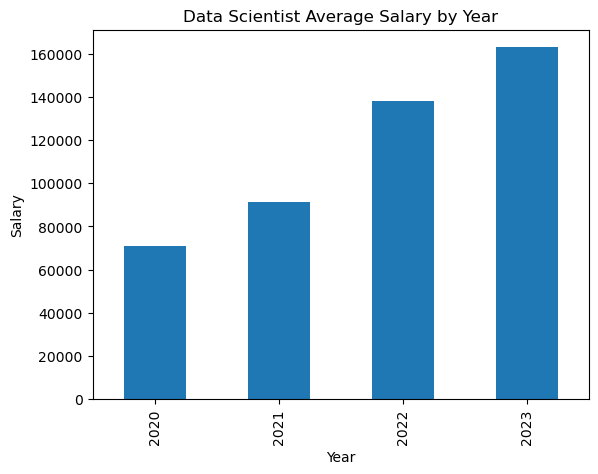

In [23]:
average_DS_salary_df.plot.bar(xlabel="Year",ylabel="Salary",legend=False,title="Data Scientist Average Salary by Year")
plt.savefig("Output/DS_bar_graph.png")
plt.show()

In [24]:
#Data Engineer averages
average_DE_salary_df = pd.DataFrame({"2020":average_salary_2020_DE,
                                   "2021":average_salary_2021_DE,
                                   "2022":average_salary_2022_DE,
                                   "2023":average_salary_2023_DE}).T
average_DE_salary_df=average_DE_salary_df.rename(columns={"salary":"Data Engineer Average Salary"})
average_DE_salary_df

,Data Engineer Average Salary
2020,"$87,390.82"
2021,"$108,388.64"
2022,"$135,463.82"
2023,"$148,378.81"


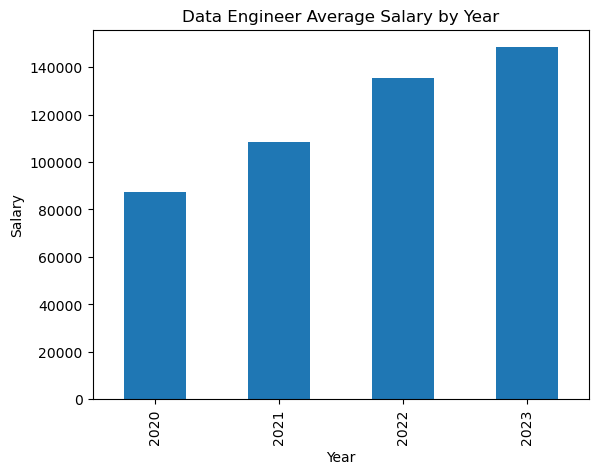

In [25]:
#Data Engineer bar graph
average_DE_salary_df.plot.bar(xlabel="Year",ylabel="Salary",legend=False,title="Data Engineer Average Salary by Year")
plt.savefig("Output/DE_bar_graph.png")
plt.show()

In [26]:
#Machine Learning Engineer averages
average_MLE_salary_df = pd.DataFrame({"2020":average_salary_2020_MLE,
                                   "2021":average_salary_2021_MLE,
                                   "2022":average_salary_2022_MLE,
                                   "2023":average_salary_2023_MLE}).T
average_MLE_salary_df=average_MLE_salary_df.rename(columns={"salary":"Machine Learning Engineer Average Salary"})
average_MLE_salary_df

,Machine Learning Engineer Average Salary
2020,"$144,500.00"
2021,"$82,627.75"
2022,"$151,210.74"
2023,"$190,905.57"


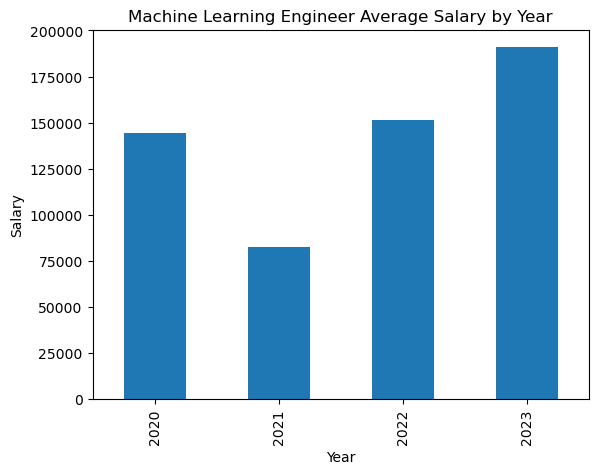

In [27]:
#Machine Learning Engineer bar graph
average_MLE_salary_df.plot.bar(xlabel="Year",ylabel="Salary",legend=False,title="Machine Learning Engineer Average Salary by Year")
plt.savefig("Output/MLE_bar_graph.png")
plt.show()

In [28]:
#Merge all of the job title dataframes to eventually create one line graph
job_title_df1 = pd.merge(average_DA_salary_df,average_DS_salary_df, left_index=True,right_index=True)
job_title_df1

,Data Analyst Average Salary,Data Scientist Average Salary
2020,"$58,500.00","$70,959.41"
2021,"$74,858.67","$91,260.00"
2022,"$105,583.58","$137,925.34"
2023,"$109,472.25","$162,942.43"


In [29]:
job_title_df2 = pd.merge(average_DE_salary_df,average_MLE_salary_df, left_index=True,right_index=True)
job_title_df2

,Data Engineer Average Salary,Machine Learning Engineer Average Salary
2020,"$87,390.82","$144,500.00"
2021,"$108,388.64","$82,627.75"
2022,"$135,463.82","$151,210.74"
2023,"$148,378.81","$190,905.57"


In [30]:
job_title_final_df =pd.merge(job_title_df1,job_title_df2, left_index=True,right_index=True)

job_title_final_df

,Data Analyst Average Salary,Data Scientist Average Salary,Data Engineer Average Salary,Machine Learning Engineer Average Salary
2020,"$58,500.00","$70,959.41","$87,390.82","$144,500.00"
2021,"$74,858.67","$91,260.00","$108,388.64","$82,627.75"
2022,"$105,583.58","$137,925.34","$135,463.82","$151,210.74"
2023,"$109,472.25","$162,942.43","$148,378.81","$190,905.57"


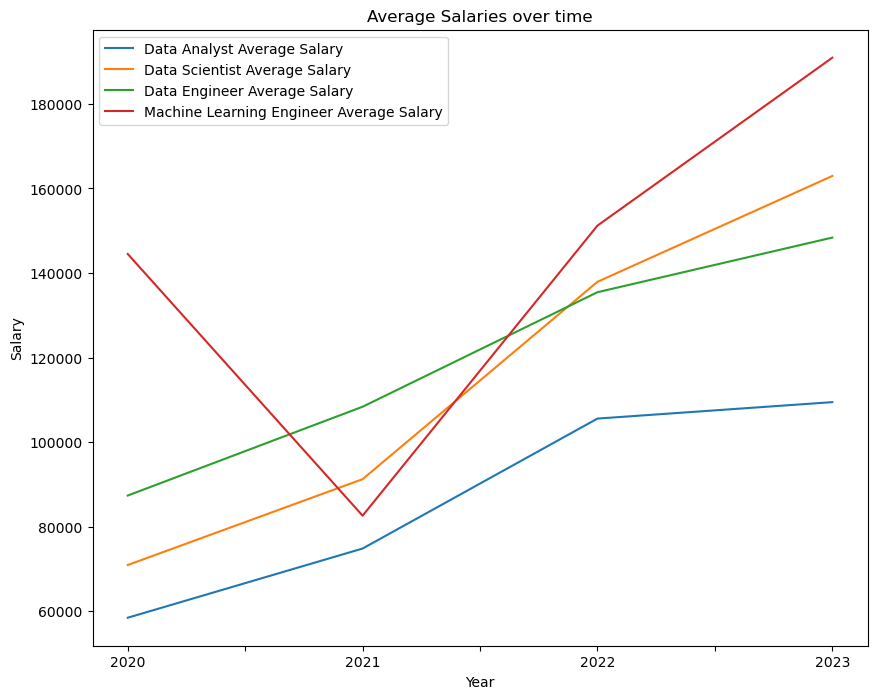

In [31]:
#time to create the line graph
ax = job_title_final_df.plot.line(figsize=(10,8),xlabel = "Year", ylabel= "Salary", title="Average Salaries over time")
plt.savefig("Output/Average_Salaries_over_time.png")
plt.show()